# 1. Read and collect data

In [1]:
# Import relevant dependencies
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
# Initialize dataset directory
path = os.getcwd()
main_directory = os.path.dirname(path)

# Read combined .csv dataset file from previous data collection
# NOTE : 'df' means dataframe
df = pd.read_csv(main_directory + '/dataset/keypoints_combined_v3.csv')

# Show a glimpse of the dataset
df

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,A,0,0,-0.175716,0.220965,-0.211916,0.533937,-0.184012,0.797134,-0.192308,...,0.139517,0.381599,0.365008,0.397436,0.417798,0.487934,0.300905,0.356712,0.250377,0.321267
1,A,0,0,-0.192946,0.240664,-0.272822,0.557054,-0.267635,0.809129,-0.206432,...,0.140041,0.349585,0.378631,0.429461,0.411826,0.576763,0.329876,0.429461,0.280083,0.340249
2,A,0,0,-0.190476,0.239130,-0.268116,0.552795,-0.260870,0.804348,-0.206004,...,0.132505,0.342650,0.378882,0.420290,0.415114,0.568323,0.324017,0.420290,0.268116,0.329193
3,A,0,0,-0.266212,0.179750,-0.427759,0.476678,-0.431172,0.786121,-0.369738,...,0.043231,0.550626,0.275313,0.583618,0.325370,0.711035,0.258248,0.530148,0.216155,0.490330
4,A,0,0,-0.232955,0.179383,-0.375812,0.495942,-0.403409,0.782468,-0.387175,...,0.101461,0.437500,0.370130,0.540584,0.387175,0.594968,0.275162,0.424513,0.233766,0.393669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Z,0,0,-0.024024,-0.117117,0.076577,-0.147147,0.310811,-0.117117,0.534535,...,0.409038,0.027810,0.484357,0.100811,0.597914,0.023175,0.495944,-0.032445,0.411356,-0.017381
1296,Z,0,0,0.063452,0.032995,0.228426,0.041878,0.447970,0.002538,0.656091,...,0.389552,0.058209,0.462687,0.120896,0.573134,0.055224,0.477612,0.011940,0.389552,0.023881
1297,Z,0,0,-0.031250,0.040179,0.142857,0.120536,0.406250,0.142857,0.616071,...,0.319797,-0.076142,0.482234,0.172589,0.573604,0.060914,0.446701,-0.040609,0.345178,-0.076142
1298,Z,0,0,0.016393,-0.021858,0.224044,0.049180,0.513661,0.065574,0.715847,...,0.205980,-0.106312,0.478405,0.016611,0.501661,-0.083056,0.345515,-0.136213,0.249169,-0.132890


In [3]:
# Initialize dataset feature and target values
X = df.drop('class', axis=1).values # features (e.g '0.1234', '0.4321', '0.0012', etc.)
y = df['class'].values # target value (e.g. 'A', 'B', 'C', etc.)

In [4]:
# Split data into 80/20 for training part and testing part
# Randomize dataset contents (to avoid possible over-fitting)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=42)

# 2. Train machine learning classification model

In [5]:
# import relevant dependencies and model libraries for training process
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [6]:
# Initialize training pipeline
pipelines = {
    'SVM':make_pipeline(StandardScaler(), SVC(probability=True, kernel='linear', C=1)),
}

In [7]:
# Train the model
fit_models = {}
for algo, pipeline in pipelines.items():

    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

# 3. Evaluate model

In [8]:
# Import dependencies for post-training evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the alphabets list to make confusion matrix chart labels
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

              precision    recall  f1-score   support

           A       0.91      1.00      0.95        10
           B       1.00      1.00      1.00        10
           C       0.91      1.00      0.95        10
           D       1.00      0.80      0.89        10
           E       1.00      1.00      1.00        10
           F       1.00      1.00      1.00        10
           G       1.00      1.00      1.00        10
           H       1.00      1.00      1.00        10
           I       1.00      1.00      1.00        10
           J       1.00      1.00      1.00        10
           K       0.91      1.00      0.95        10
           L       1.00      0.90      0.95        10
           M       1.00      1.00      1.00        10
           N       1.00      1.00      1.00        10
           O       1.00      1.00      1.00        10
           P       1.00      1.00      1.00        10
           Q       1.00      1.00      1.00        10
           R       1.00    

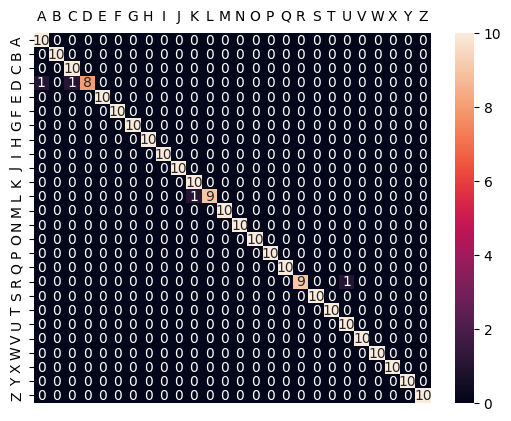

In [9]:
# Run training evaluation
for index, model in fit_models.items():
    pred = model.predict(X_test)
    
    # Show confusion matrix chart
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, xticklabels=labels, yticklabels=labels);
    print(classification_report(y_test, pred))

# 4. Serialize/Export model

In [10]:
# import dependencies
import pickle 

In [11]:
# Export trained model into specified directory as .pkl file
with open(main_directory+'/model/svm_trained_classifier_test.pkl', 'wb') as f:
    pickle.dump(fit_models['SVM'], f)